[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


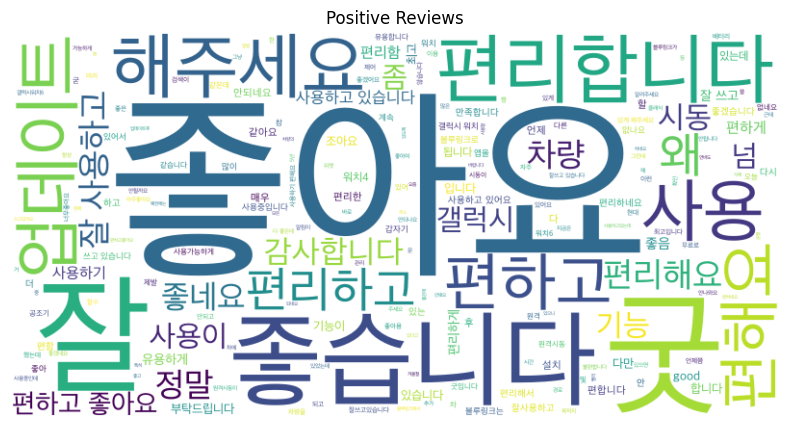

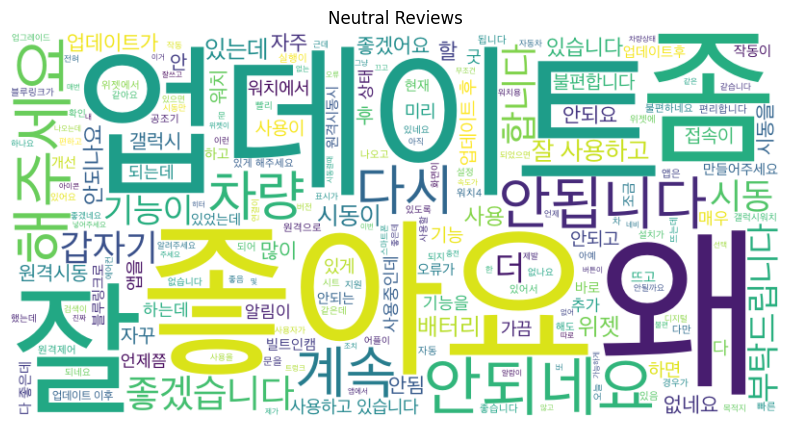

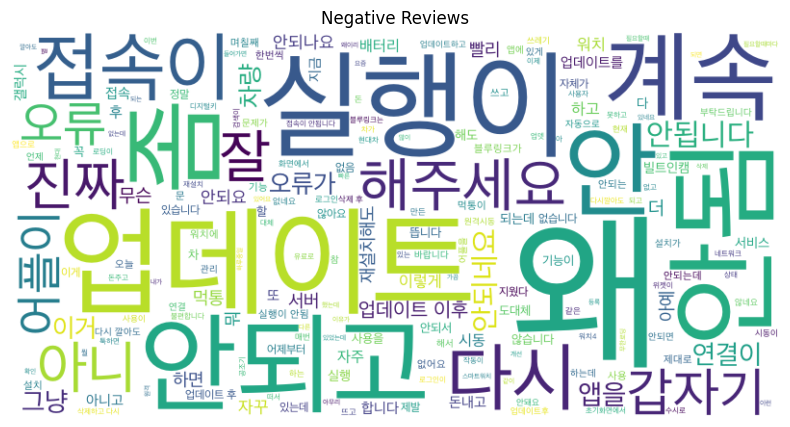

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_play_scraper import reviews_all, Sort

import re
from nltk.corpus import stopwords

# NLTK 불용어 다운로드 (최초 1회 실행 필요)
import nltk
nltk.download('stopwords')

# 한국어 불용어 리스트에 단어 추가
korean_stopwords = [
    '이', '그', '저', '것', '수', '저희', '저것', '그것', '들', '때',
    '그리고', '그러나', '하지만', '블루링크', '어플', '아주', '너무', '정말',
    '또한', '그래서', '때문', '어디', '무엇',  '어떻게',
    '앱', '앱이'  
]

app_id = 'com.velox.hkmc_tm1k'  
reviews = reviews_all(
    app_id,
    lang='ko',  
    country='kr', 
    sort=Sort.NEWEST  
)

# 데이터프레임 생성
df = pd.DataFrame(reviews)
#df.to_csv('reviews.csv', index=False)

# 리뷰 분류
positive_reviews = df[df['score'] == 5].head(1000)
neutral_reviews = df[df['score'].isin([3, 4])].head(1000)
negative_reviews = df[df['score'].isin([1, 2])].head(1000)

# 조사 빼는 함수
def remove_korean_postpositions(text):
    postpositions = r'\b(이|가|은|는|을|를|에|의|와|과|로|으로|에서|에게|한테|밖에|마저|조차|까지|도|만|처럼|보다|부터|까지|이라|라고)\b'
    text = re.sub(postpositions, '', text)
    return text

def preprocess_text(text):
    # text_clean 함수 적용
    text = text_clean(text)
    text = text.lower()
    
    # 한국어 조사 제거
    text = remove_korean_postpositions(text)
    
    # 한국어와 영어 불용어 제거
    all_stop_words = set(stopwords.words('english')) | set(korean_stopwords)
    text = ' '.join([word for word in text.split() if word not in all_stop_words])
    return text

# 텍스트 정제 함수
def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'  # E-mail 제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  # URL 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거    
    # text = re.sub(pattern, '', text)
    # pattern = '([a-zA-Z0-9]+)'   # 알파벳, 숫자 제거  
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호 제거
    text = re.sub(pattern, '', text)
    return text

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=200,
        background_color='white',
        font_path='/System/Library/Fonts/Supplemental/AppleSDGothicNeo.ttc'  # 한글 폰트 경로 설정
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
# 긍정 리뷰 워드 클라우드
positive_text = ' '.join(positive_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(positive_text, 'Positive Reviews')

# 중립 리뷰 워드 클라우드
neutral_text = ' '.join(neutral_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(neutral_text, 'Neutral Reviews')

# 부정 리뷰 워드 클라우드
negative_text = ' '.join(negative_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(negative_text, 'Negative Reviews')